## Introduction to the Interstellar Medium
### Jonathan Williams

### Figure 8.8: optical image of the Veil nebula, a supernova remnant transitioning to the momentum conserving phase of evolution

#### data from skyview (DSS2 red)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
%matplotlib inline

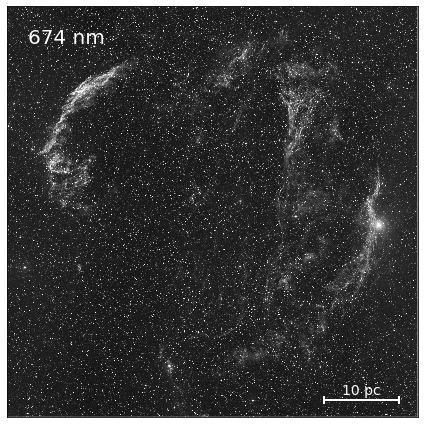

In [5]:
fig = plt.figure(figsize=(6,6))

hdu = fits.open('veil_DSS2_red.fits')
wcs1 = WCS(hdu[0])
ax1 = fig.add_subplot(111, projection=wcs1)
im1 = hdu[0].data
hd1 = hdu[0].header
#print(im1.shape)
#print(im1.min(),im1.max())

imin, imax = 100, 1900
jmin, jmax = 150, 1950

ax1.imshow(im1[imin:imax, jmin:jmax], cmap='gray', origin='lower', vmin=0, vmax=20000)
hdu.close()

# scale bar
ax1.set_xlim(0,imax-imin-1)
ax1.set_ylim(0,jmax-jmin-1)
dx = hd1['CDELT1']
# 0.00175 deg = 6.3 arcsec per pixel = 0.0305 pc at 1.0 kpc (Fesen et al. 2017)
xbar = 327.4
x0 = 1390
x1 = x0 + xbar
y0 = 75
dy = 13
ax1.plot([x0,x1],[y0,y0], 'w-', lw=2)
ax1.plot([x0,x0],[y0-dy,y0+dy], 'w-', lw=2)
ax1.plot([x1,x1],[y0-dy,y0+dy], 'w-', lw=2)
ax1.text(0.5*(x0+x1), y0+2*dy, '10 pc', color='white', fontsize=14, ha='center')

for i in (0,1):
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_ticks_visible(False)
    ax1.coords[i].set_ticklabel_visible(False)
    ax1.coords[i].set_axislabel('')
    ax1.coords[i].set_axislabel('')
ax1.text(0.05, 0.91, '674 nm', {'color': 'white', 'fontsize': 20}, transform=ax1.transAxes)

fig.tight_layout()
plt.savefig('veil_SNR.pdf')